# Técnicas Básicas de NLP en Jupyter Notebook


Este notebook introduce algunas técnicas fundamentales del Procesamiento del Lenguaje Natural (NLP), una rama de la Inteligencia Artificial que permite a las computadoras comprender y manipular texto en lenguaje humano.

Exploraremos diversas técnicas esenciales de NLP con ejemplos en español.








In [77]:
# Importación de librerías necesarias

import re
import nltk
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from difflib import SequenceMatcher

In [78]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar modelo de SpaCy
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sil46\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sil46\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sil46\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\sil46\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.7.0) was trained with spaCy v3.7.0 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


# 1. Tokenización y Normalización

La tokenización es el proceso de dividir un texto en unidades más pequeñas (tokens), como palabras o frases.
Esto es útil para el análisis de texto, ya que permite tratar cada palabra como una entidad independiente.



In [79]:
texto = "Río Grande es una de las ciudades más importantes de la provincia de Tierra del Fuego, Antártida e Islas del Atlántico Sur, en Argentina. Ubicada en la costa noreste de la isla grande, se destaca por su actividad industrial, especialmente en el sector electrónico y textil, así como por su historia vinculada a la ganadería ovina. Además, es conocida como la ""Capital Nacional de la Trucha debido a la abundancia de estos peces en sus ríos, lo que atrae a pescadores de todo el mundo. Su clima frío y ventoso, junto con sus paisajes naturales, la convierten en un lugar único en el extremo sur del país."
palabras_tokenizadas = word_tokenize(texto, language="spanish")
oraciones_tokenizadas = sent_tokenize(texto, language="spanish")
print("Tokenización en palabras:", palabras_tokenizadas)
print("Tokenización en oraciones:", oraciones_tokenizadas)



Tokenización en palabras: ['Río', 'Grande', 'es', 'una', 'de', 'las', 'ciudades', 'más', 'importantes', 'de', 'la', 'provincia', 'de', 'Tierra', 'del', 'Fuego', ',', 'Antártida', 'e', 'Islas', 'del', 'Atlántico', 'Sur', ',', 'en', 'Argentina', '.', 'Ubicada', 'en', 'la', 'costa', 'noreste', 'de', 'la', 'isla', 'grande', ',', 'se', 'destaca', 'por', 'su', 'actividad', 'industrial', ',', 'especialmente', 'en', 'el', 'sector', 'electrónico', 'y', 'textil', ',', 'así', 'como', 'por', 'su', 'historia', 'vinculada', 'a', 'la', 'ganadería', 'ovina', '.', 'Además', ',', 'es', 'conocida', 'como', 'la', 'Capital', 'Nacional', 'de', 'la', 'Trucha', 'debido', 'a', 'la', 'abundancia', 'de', 'estos', 'peces', 'en', 'sus', 'ríos', ',', 'lo', 'que', 'atrae', 'a', 'pescadores', 'de', 'todo', 'el', 'mundo', '.', 'Su', 'clima', 'frío', 'y', 'ventoso', ',', 'junto', 'con', 'sus', 'paisajes', 'naturales', ',', 'la', 'convierten', 'en', 'un', 'lugar', 'único', 'en', 'el', 'extremo', 'sur', 'del', 'país', '.

In [32]:
# Vemos que en castellano, el lenguaje natural (escrito) puede tener distintas fuentes de variaciones:

Mayúsculas
Tildes
Signos ortográficos
Errores de tipeo
Variaciones propias del lenguaje como la conjugación
Artefactos de la escritura informal como ""holaaa""
¿Cómo abordarán esto nuestros algorítmos?

Una solución es la normalización: con acepción similar aunque distinta a la que usamos en estadística, va a significar transformar a los strings a representaciones iguales.

Podemos:

Sacar espacios
Pasar a minúsculas
Quitar tildes

SyntaxError: invalid syntax (908849721.py, line 5)

In [83]:

import torch
import torch.nn as nn

class ModeloPLN(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.fc = nn.Linear(embed_dim, 1)

    def forward(self, x):
        x = self.embedding(x).mean(dim=1)
        return torch.sigmoid(self.fc(x))


In [33]:
print("Hola Mundo")

Hola Mundo


In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Definir modelo
model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:


import tensorflow as tf
from tensorflow import keras

# Modelo de lenguaje simple
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [58]:
import os
import pandas as pd

archivo = 'comentarios.csv'

# Verifica la carpeta donde se está ejecutando el notebook
print(f"📂 Carpeta actual: {os.getcwd()}")

# Lista los archivos disponibles
print(f"📄 Archivos en la carpeta: {os.listdir()}")

# Intenta cargar el archivo si existe
if os.path.exists(archivo):
    dataset = pd.read_csv(archivo, encoding='utf-8')
    dataset['texto'] = dataset['texto'].astype(str).str.lower()
    print(dataset.head())
else:
    print(f"❌ Error: El archivo '{archivo}' no fue encontrado en la carpeta actual.")


📂 Carpeta actual: C:\Users\sil46\PDH2025\clase2\noteboks
📄 Archivos en la carpeta: ['.ipynb_checkpoints', 'comentarios.csv', 'TecnicasBasicasNPL.ipynb', 'Untitled.ipynb']


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 14: invalid continuation byte

In [70]:
import os
import pandas as pd

archivo = 'comentarios.csv'

# Verifica si el archivo existe
if os.path.exists(archivo):  
    # Lee el archivo con codificación alternativa para evitar errores
    dataset = pd.read_csv(archivo, encoding='latin1', sep=';')  
    dataset['texto'] = dataset['texto'].astype(str).str.lower()
    
    print(dataset.head())
else:
    print(f" Error: El archivo '{archivo}' no fue encontrado en la carpeta actual.")



                            texto etiqueta (opcional)
0        "me encantó la película"            positivo
1      "el servicio fue terrible"            negativo
2         "la comida estaba bien"             neutral
3     "no volveré a comprar aquí"            negativo
4  "excelente atención y rapidez"            positivo


# 2. Expresiones Regulares

Las expresiones regulares permiten encontrar patrones en textos.
Aquí buscamos la palabra 'procesamiento' dentro del texto.


In [72]:
import numpy as np

# Simulación de embeddings de palabras
palabras = {"hola": np.array([0.1, 0.2, 0.3]), "mundo": np.array([0.4, 0.5, 0.6])}
print(palabras["hola"])  # Representación numérica de "hola"

[0.1 0.2 0.3]


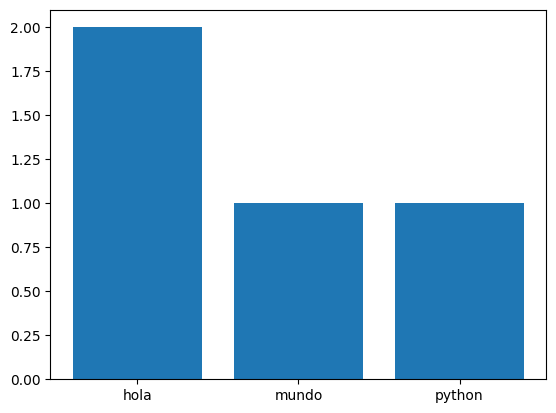

In [73]:
import matplotlib.pyplot as plt
from collections import Counter

datos = ["hola", "mundo", "hola", "python"]
conteo = Counter(datos)
plt.bar(conteo.keys(), conteo.values())
plt.show()


In [51]:
patron = r"\b[Pp]rocesamiento\b"
coincidencias = re.findall(patron, texto)
print("Coincidencias de 'el':", coincidencias)

Coincidencias de 'el': []


C:\Users\sil46\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


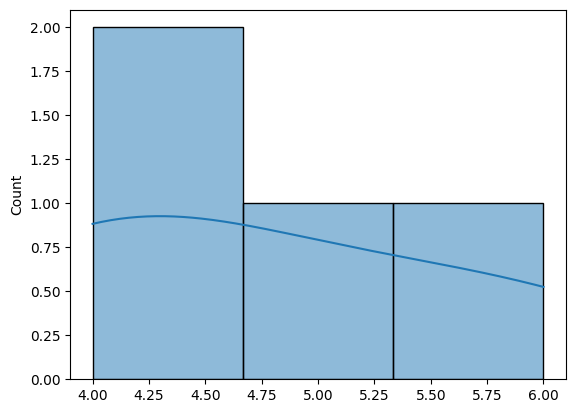

In [74]:
import seaborn as sns

longitudes = [len(palabra) for palabra in datos]
sns.histplot(longitudes, kde=True)
plt.show()

# 3. Uso de NLTK - Stop Words

Las 'stop words' son palabras comunes que suelen eliminarse en el análisis de texto,
ya que no aportan demasiado significado (ejemplo: 'el', 'es', 'de').





In [76]:
from scipy.signal import butter, filtfilt
import numpy as np

# Crear una señal de ejemplo
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)
senal = np.sin(2 * np.pi * 5 * t)  # Señal senoidal

# Filtrado
b, a = butter(4, 0.1)
senal_filtrada = filtfilt(b, a, senal)


In [52]:
stop_words = set(stopwords.words('spanish'))
palabras_filtradas = [palabra for palabra in palabras_tokenizadas if palabra.lower() not in stop_words]
print("Texto sin stop words:", palabras_filtradas)

Texto sin stop words: ['Río', 'Grande', 'ciudades', 'importantes', 'provincia', 'Tierra', 'Fuego', ',', 'Antártida', 'Islas', 'Atlántico', 'Sur', ',', 'Argentina', '.', 'Ubicada', 'costa', 'noreste', 'isla', 'grande', ',', 'destaca', 'actividad', 'industrial', ',', 'especialmente', 'sector', 'electrónico', 'textil', ',', 'así', 'historia', 'vinculada', 'ganadería', 'ovina', '.', 'Además', ',', 'conocida', 'Capital', 'Nacional', 'Trucha', 'debido', 'abundancia', 'peces', 'ríos', ',', 'atrae', 'pescadores', 'mundo', '.', 'clima', 'frío', 'ventoso', ',', 'junto', 'paisajes', 'naturales', ',', 'convierten', 'lugar', 'único', 'extremo', 'sur', 'país', '.']


# 4. Distancias entre strings
"""
Las distancias entre cadenas permiten comparar similitud entre palabras,
lo que es útil para la corrección ortográfica y el análisis de variantes.
"""

In [53]:
def similaridad_cadena(cadena1, cadena2):
    return SequenceMatcher(None, cadena1, cadena2).ratio()
print("Similitud entre 'lenguaje' y 'lengua':", similaridad_cadena("lenguaje", "lengua"))


Similitud entre 'lenguaje' y 'lengua': 0.8571428571428571


# 5. Vectorización
"""
La vectorización convierte el texto en una representación numérica.
Aquí usamos la técnica de Bolsa de Palabras (BoW), que cuenta la frecuencia de cada palabra.
"""

In [27]:
corpus = [
    "Río Grande es el corazón industrial de Tierra del Fuego, con un fuerte desarrollo en el sector electrónico y textil."
    "Sus ríos caudalosos y fríos la han convertido en la 'Capital Nacional de la Trucha', atrayendo pescadores de todo el mundo."
    "El viento constante y el clima frío caracterizan a Río Grande, dándole una identidad única en el extremo sur de Argentina."
    "La historia de Río Grande está ligada a la ganadería ovina, una actividad que impulsó su crecimiento económico en el siglo XX."
    "A orillas del Atlántico, Río Grande combina paisajes naturales impresionantes con una comunidad pujante y trabajadora.",
   ]
vectorizador = CountVectorizer()
X = vectorizador.fit_transform(corpus)
print("Representación BoW:", X.toarray())
print("Palabras en el vocabulario:", vectorizador.get_feature_names_out())

Representación BoW: [[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 5 2 1 1 1 7 1 4 1 1 1 1 1 1 1 1 4 1 1 1 1
  1 1 5 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1]]
Palabras en el vocabulario: ['actividad' 'argentina' 'atlántico' 'atrayendo' 'capital' 'caracterizan'
 'caudalosos' 'clima' 'combina' 'comunidad' 'con' 'constante' 'convertido'
 'corazón' 'crecimiento' 'de' 'del' 'desarrollo' 'dándole' 'económico'
 'el' 'electrónico' 'en' 'es' 'está' 'extremo' 'frío' 'fríos' 'fuego'
 'fuerte' 'ganadería' 'grande' 'han' 'historia' 'identidad'
 'impresionantes' 'impulsó' 'industrial' 'la' 'ligada' 'mundo' 'nacional'
 'naturales' 'orillas' 'ovina' 'paisajes' 'pescadores' 'pujante' 'que'
 'río' 'ríos' 'sector' 'siglo' 'su' 'sur' 'sus' 'textil' 'tierra' 'todo'
 'trabajadora' 'trucha' 'un' 'una' 'viento' 'xx' 'única']


# 6. N-gramas
"""
Los N-gramas permiten analizar secuencias de palabras en lugar de palabras individuales.
Aquí extraemos bigramas (pares de palabras).
"""




In [28]:
vectorizador_ngrams = CountVectorizer(ngram_range=(2,2))
X_ngrams = vectorizador_ngrams.fit_transform(corpus)
print("Bigramas:", vectorizador_ngrams.get_feature_names_out())

Bigramas: ['actividad que' 'argentina la' 'atlántico río' 'atrayendo pescadores'
 'capital nacional' 'caracterizan río' 'caudalosos fríos' 'clima frío'
 'combina paisajes' 'comunidad pujante' 'con un' 'con una' 'constante el'
 'convertido en' 'corazón industrial' 'crecimiento económico'
 'de argentina' 'de la' 'de río' 'de tierra' 'de todo' 'del atlántico'
 'del fuego' 'desarrollo en' 'dándole una' 'económico en' 'el clima'
 'el corazón' 'el extremo' 'el mundo' 'el sector' 'el siglo' 'el viento'
 'electrónico textil' 'en el' 'en la' 'es el' 'está ligada' 'extremo sur'
 'frío caracterizan' 'fríos la' 'fuego con' 'fuerte desarrollo'
 'ganadería ovina' 'grande combina' 'grande dándole' 'grande es'
 'grande está' 'han convertido' 'historia de' 'identidad única'
 'impresionantes con' 'impulsó su' 'industrial de' 'la capital'
 'la ganadería' 'la han' 'la historia' 'la trucha' 'ligada la' 'mundo el'
 'nacional de' 'naturales impresionantes' 'orillas del' 'ovina una'
 'paisajes naturales' 'pes

# 7. Stemming
"""
El stemming reduce las palabras a su raíz, eliminando sufijos.
Puede ayudar a agrupar palabras con significados similares.
"""



In [29]:
stemmer = PorterStemmer()
palabras_stemmed = [stemmer.stem(palabra) for palabra in palabras_filtradas]
print("Stemming:", palabras_stemmed)


Stemming: ['procesamiento', 'lenguaj', 'natur', 'permit', 'máquina', 'entend', 'lenguaj', 'humano', '.', 'área', 'fascinant', 'inteligencia', 'artifici', '.']


# 8. Lematización
"""
La lematización transforma las palabras a su forma base respetando su gramática,
lo que mejora el análisis en comparación con el stemming.
"""
lemmatizer = WordNetLemmatizer()
palabras_lemmatized = [lemmatizer.lemmatize(palabra) for palabra in palabras_filtradas]
print("Lematización:", palabras_lemmatized)



# 9. Uso de SpaCy - Análisis Morfológico
"""
SpaCy permite realizar análisis morfológico, extrayendo información gramatical de las palabras.
Aquí mostramos la lematización con SpaCy.
"""
doc = nlp(texto)
print("Lematización con SpaCy:", [token.lemma_ for token in doc])



# 10. Limitaciones de Bolsa de Palabras
"""
TF-IDF (Term Frequency - Inverse Document Frequency) mejora la representación del texto
dando más importancia a palabras clave en un conjunto de documentos.
"""
vectorizador_tfidf = TfidfVectorizer()
X_tfidf = vectorizador_tfidf.fit_transform(corpus)
print("TF-IDF:", X_tfidf.toarray())



# 11. Análisis de Sentimiento con SpaCy
"""
Los modelos de análisis de sentimiento pueden evaluar si un texto tiene una connotación positiva, negativa o neutra.
Aquí analizamos una reseña sobre NLP.
"""
doc = nlp("Me fascina el procesamiento del lenguaje natural, pero a veces puede ser desafiante.")
print("Tokens y sus sentimientos:", [(token.text, token.sentiment) for token in doc])

### Actividad para los estudiantes:
"""
1. Prueba la tokenización con un texto de tu elección.
2. Modifica el patrón de expresiones regulares para encontrar la palabra 'inteligencia'.
3. Agrega más frases a la vectorización y analiza los resultados.
4. Prueba con otras frases en el análisis de sentimiento.
"""